### Gradient Boosting Regressor
_Fitting to errors one booster stage at a time_

**_Gradient Boosting_** is an ensemble machine learning technique that builds a series of decision trees, each aimed at correcting the errors of the previous ones. Unlike **_AdaBoost_**, which uses shallow trees, Gradient Boosting uses deeper trees as its weak learners. Each new tree focuses on minimizing the residual errors — the differences between actual and predicted values — rather than learning directly from the original targets.

For regression tasks, Gradient Boosting adds trees one after another with each new tree is trained to reduce the remaining errors by addressing the current residual errors. The final prediction is made by adding up the outputs from all the trees.

The model’s strength comes from its additive learning process — while each tree focuses on correcting the remaining errors in the ensemble, the sequential combination creates a powerful predictor that progressively reduces the overall prediction error by focusing on the parts of the problem where the model still struggles.

> Gradient Boosting is part of the boosting family of algorithms because it builds trees sequentially, with each new tree trying to correct the errors of its predecessors. However, unlike other boosting methods, Gradient Boosting approaches the problem from an optimization perspective.

#### Dataset Used

Focussing on the classic golf dataset, the simpler task which in this case is the regression will be — predicting the number of players who will show up to play golf based on weather conditions.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Create dataset
dataset_dict = {
   'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 
               'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain',
               'sunny', 'overcast', 'rain', 'sunny', 'sunny', 'rain', 'overcast',
               'rain', 'sunny', 'overcast', 'sunny', 'overcast', 'rain', 'overcast'],
   'Temp.': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0,
             72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0,
             88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
   'Humid.': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0,
              90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0,
              65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
   'Wind': [False, True, False, False, False, True, True, False, False, False, True,
            True, False, True, True, False, False, True, False, True, True, False,
            True, False, False, True, False, False],
   'Num_Players': [52, 39, 43, 37, 28, 19, 43, 47, 56, 33, 49, 23, 42, 13, 33, 29,
                   25, 51, 41, 14, 34, 29, 49, 36, 57, 21, 23, 41]
}

# Prepare data
df = pd.DataFrame(dataset_dict)
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='')
df['Wind'] = df['Wind'].astype(int)

# Split features and target
X, y = df.drop('Num_Players', axis=1), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

Here’s how Gradient Boosting works:

1. **_Initialize Model_**: Start with a simple prediction, typically the mean of target values.

2. **_Iterative Learning_**: For a set number of iterations, compute the residuals, train a decision tree to predict these residuals, and add the new tree’s predictions (scaled by the learning rate) to the running total.

3. **_Build Trees on Residuals_**: Each new tree focuses on the remaining errors from all previous iterations.

4. **_Final Prediction_**: Sum up all tree contributions (scaled by the learning rate) and the initial prediction.

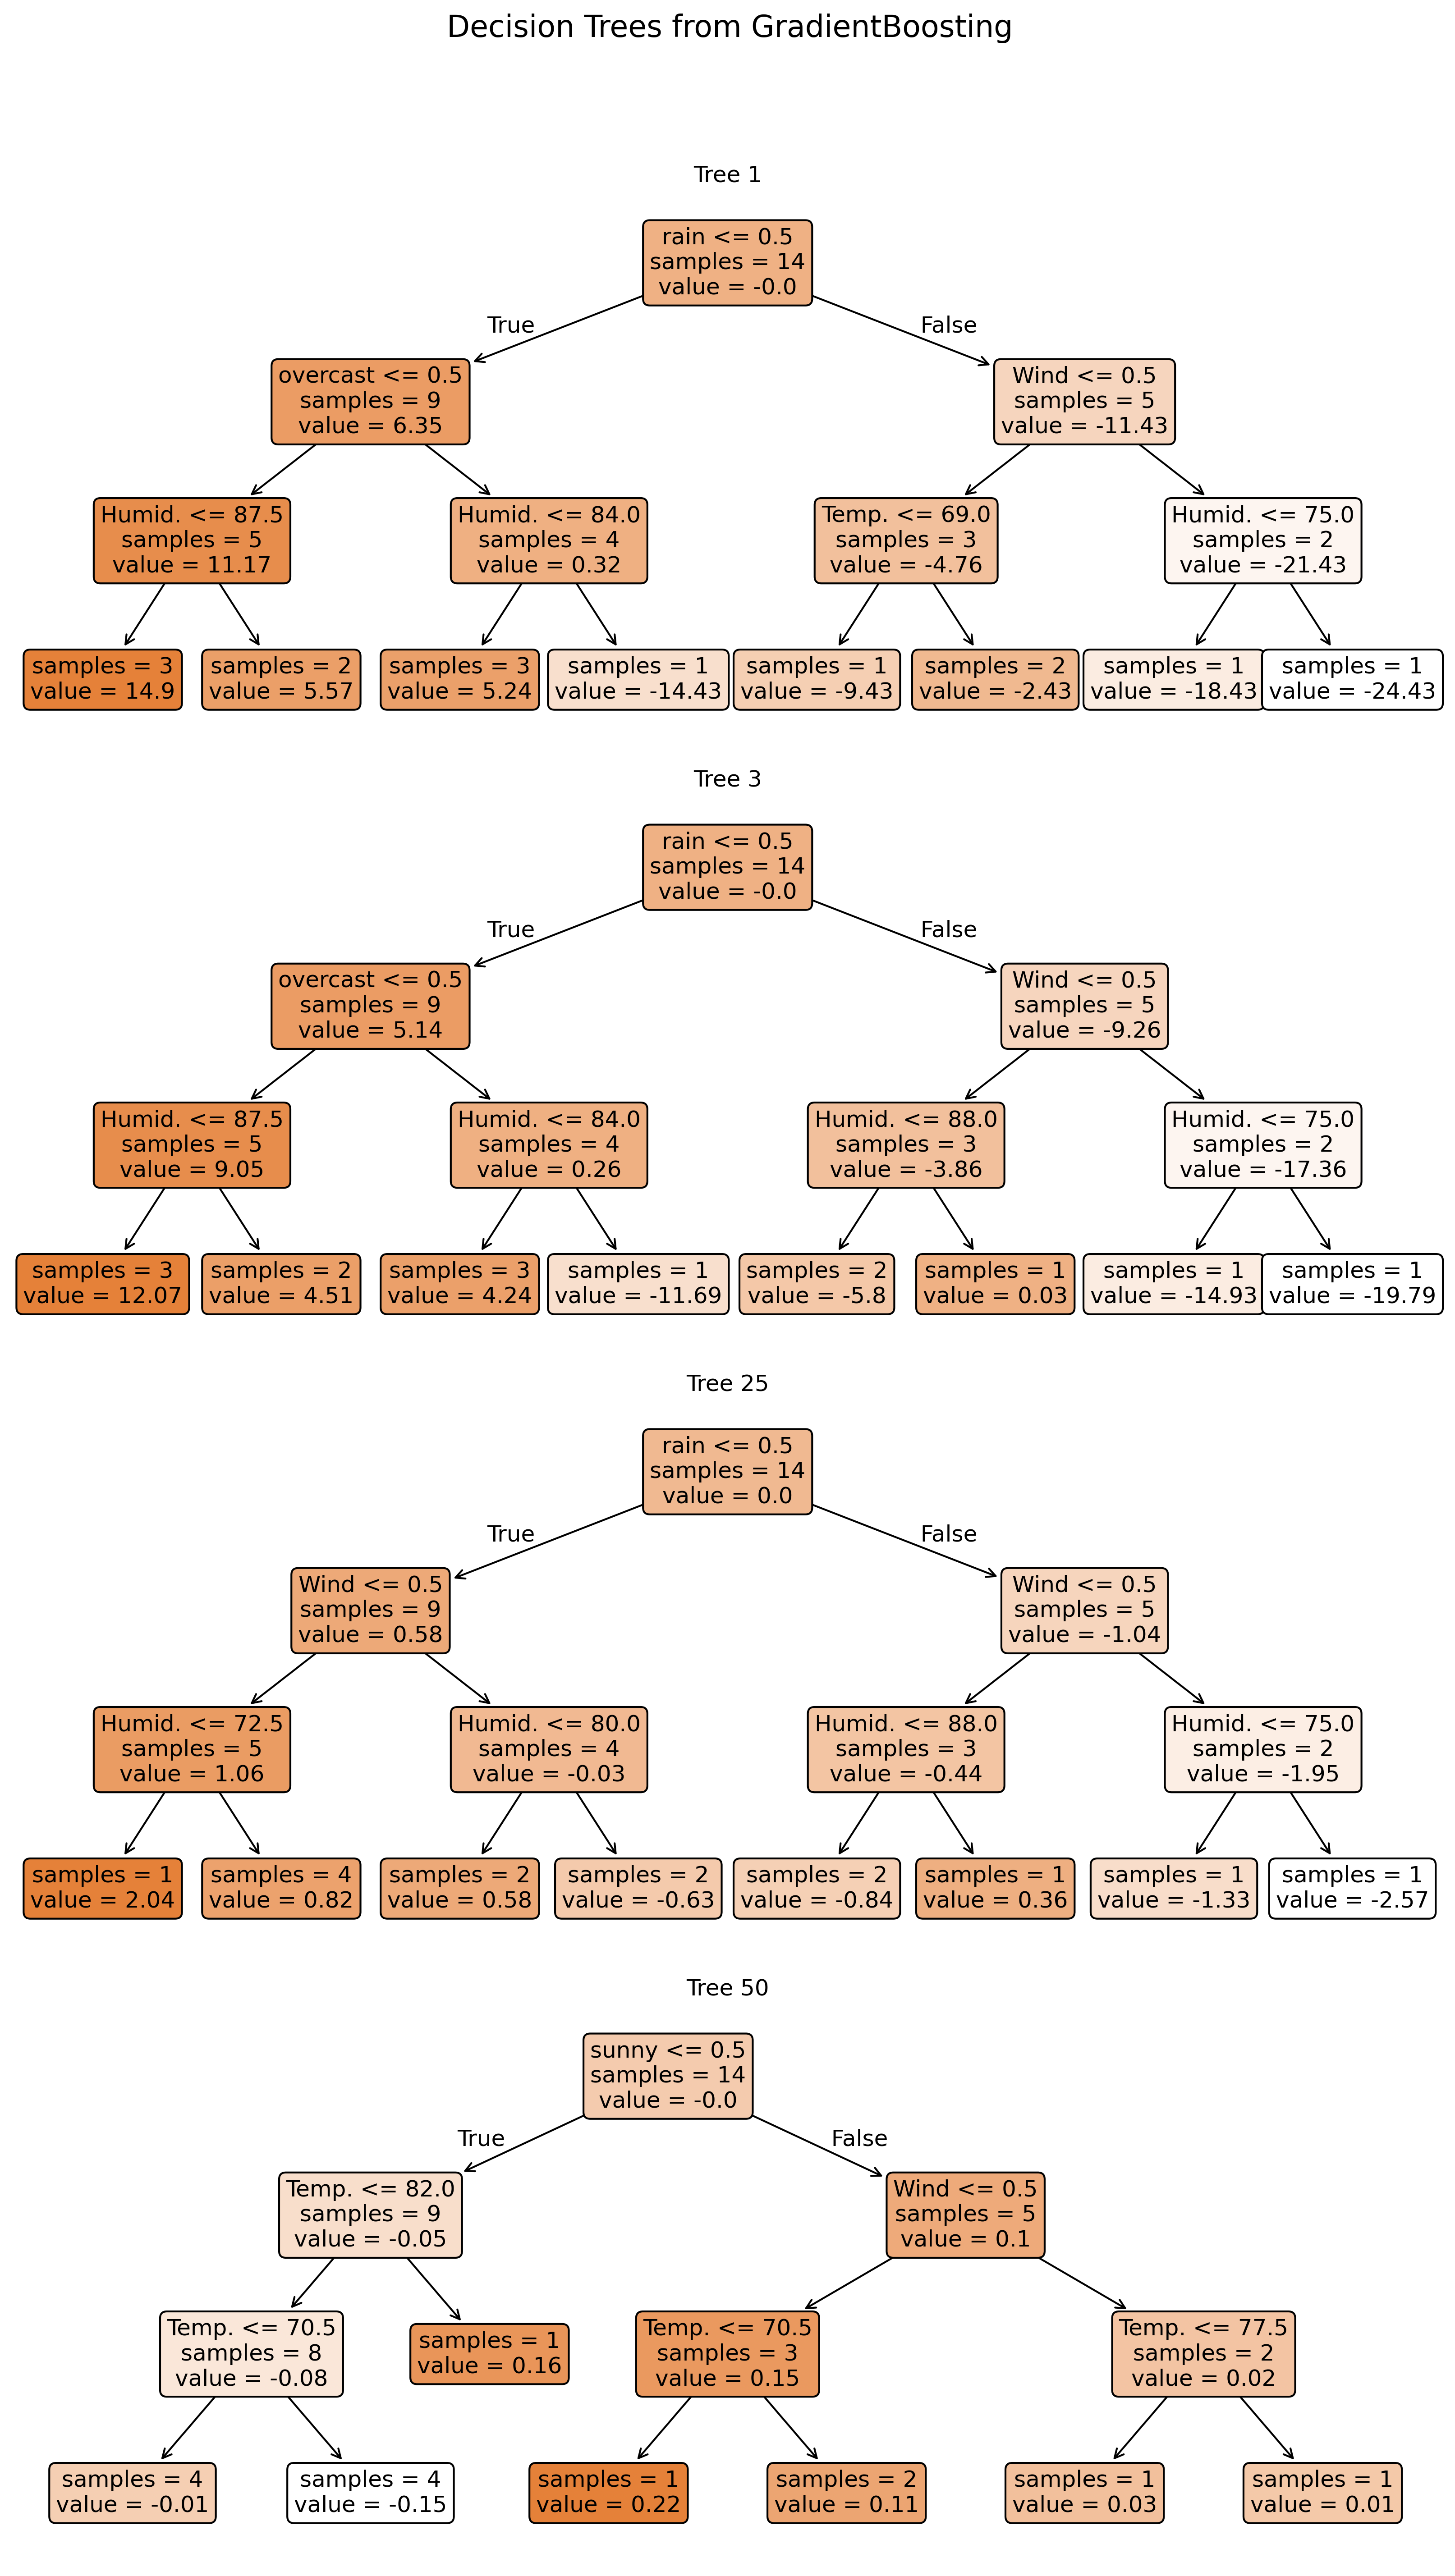

In [2]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Train the model
clf = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.1, random_state=42)
clf.fit(X_train, y_train)

# Plot trees 1, 2, 49, and 50
plt.figure(figsize=(11, 20), dpi=300)

for i, tree_idx in enumerate([0, 2, 24, 49]):
    plt.subplot(4, 1, i+1)
    plot_tree(clf.estimators_[tree_idx,0], 
              feature_names=X_train.columns,
              impurity=False,
              filled=True, 
              rounded=True,
              precision=2,
              fontsize=12)
    plt.title(f'Tree {tree_idx + 1}')

plt.suptitle('Decision Trees from GradientBoosting', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [3]:
# Get predictions
y_pred = clf.predict(X_test)

# Create DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(results_df) # Display results DataFrame

# Calculate and display RMSE
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
print(f"\nModel Accuracy: {rmse:.4f}")

    Actual  Predicted
14      33  38.992320
15      29  31.012362
16      25  32.991445
17      51  48.942655
18      41  46.819157
19      14  15.380151
20      34  26.808298
21      29  32.964361
22      49  49.265694
23      36  42.469100
24      57  52.881795
25      21  23.758305
26      23  28.147929
27      41  42.992096

Model Accuracy: 4.6921


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Create dataset
dataset_dict = {
   'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 
               'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain',
               'sunny', 'overcast', 'rain', 'sunny', 'sunny', 'rain', 'overcast',
               'rain', 'sunny', 'overcast', 'sunny', 'overcast', 'rain', 'overcast'],
   'Temp.': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0,
             72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0,
             88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
   'Humid.': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0,
              90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0,
              65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
   'Wind': [False, True, False, False, False, True, True, False, False, False, True,
            True, False, True, True, False, False, True, False, True, True, False,
            True, False, False, True, False, False],
   'Num_Players': [52, 39, 43, 37, 28, 19, 43, 47, 56, 33, 49, 23, 42, 13, 33, 29,
                   25, 51, 41, 14, 34, 29, 49, 36, 57, 21, 23, 41]
}

# Prepare data
df = pd.DataFrame(dataset_dict)
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='')
df['Wind'] = df['Wind'].astype(int)

# Split features and target
X, y = df.drop('Num_Players', axis=1), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Train Gradient Boosting
gb = GradientBoostingRegressor(
   n_estimators=50,     # Number of boosting stages (trees)
   learning_rate=0.1,    # Shrinks the contribution of each tree
   max_depth=3,          # Depth of each tree
   subsample=0.8,        # Fraction of samples used for each tree
   random_state=42
)
gb.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 5.03
